# EDA (Exploratory Data Analysis)

### En que consiste? 
Consiste en investigar y comprender los datos mediante técnicas visuales y estadísticas para descubrir patrones, identificar anomalías, probar hipótesis y extraer información útil. <div>El EDA ayuda a los científicos de datos y analistas a obtener una comprensión inicial de los datos antes de aplicar modelos predictivos o análisis más avanzados.

En este proyecto vamos a tener datos de una empresa prestadora de servicios de telecomunicaciones, vamos a realizar un análisis completo que permita reconocer el comportamiento de este sector a nivel nacional. 



## 1. Conocimiento del negocio

### ***Contexto***

-----------------------------
#### Empresa Telecom(Empresa Fictisia), prestadora de servicios de telecomunicaciones, principal actividad de la empresa es brindar **acceso a internet** a nivel nacional, además tiene otros servicios que es importante tener en cuenta como:
- Internet
- Telefonía Móvil 
- Televisión 
- Telefonía Fija 
- Servicios postales

**Preguntas**
>
>
> **1.Datos** <div>
> 1. ¿En qué formato se encuentra los datos? 
> 2. ¿Qué variables (Columnas) estan disponibles en el cojunto de datos?  
> 3. ¿Qué tipos de datos están incluidos? 
> 4. ¿Hay Valores faltantes?
> 5. ¿Hay columnas anidadas?
> 6. ¿Existen valores atípicos(outliers) en alguna de las variables? </div>
> 
> **2.Analisís Descriptivo** <div>
> 1. ¿Cuál es la distribución de los datos en términos de variables numéricas y categóricas?
> 2. ¿Cómo se relacionan las distintas variables categóricas y numéricas entre sí? 
> 3. ¿Cuál es la distribución de la edad de los usuarios?</div>
> 
> **3. Uso de internet** <div>
> 1. ¿Cuál es el uso promedio de intenet por usuario(en términos de GB o tiempo)? 
> 2. ¿Cuál es el uso total de internet para el período de estudio? 
> 3. ¿Cuál es la media y mediana del uso de internet por día/semana/mes?
> 4. ¿Existen patrones de uso de internet en diferentes horas del día o días de la semana?</div>
> 
> **4. Tipos de Servicios, Productos y Churn** <div>
> 1. ¿Cuáles son los servicios de internet más populares?
> 2. ¿Existen diferencias en el uso de servicios entre diferentes segmentos de clientes?
> 3. ¿Cómo varía el uso de internet entre diferentes planes de servicio?
> 4. ¿Cuál es la tasa de churn (deserción) de los clientes?</div>
>
>
> **5. Análisis Geoespacial** <div>
> 1. ¿Cómo se distribuye el uso de internet en diferentes regiones geográficas?
> 2. ¿Existen áreas con problemas recurrentes de conectividad o baja velocidad?
> 3. ¿Cuál es la distribución de los usuarios por edad, género y ubicación geográfica?</div>

***Las preguntas pueden cambiar***

## 2. Entendimiento de datos

### ***2.1 Importamos  librerías***

In [1]:
# Importamos las librerias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

### ***2.2 Carga inicial de los datos***

In [2]:
# Cargar el archivo
data = ("Data/Internet.xlsx")

El archivo de excel contiene un total de 15 hojas, para el análisis inicial usaremos todas las hojas. 

In [3]:
# Desglozamos el archivo excel a df
df_acc_vel_loc_sinrangos = pd.read_excel(data, sheet_name= 'Acc_vel_loc_sinrangos') # Primera hoja de excel
df_vel_sinrangos = pd.read_excel(data, sheet_name= 'Velocidad_sin_Rangos') # Segunda hoja de excel
df_vel_porce_pro = pd.read_excel(data, sheet_name= 'Velocidad % por prov') # Tercera hoja de excel
df_total_vmd = pd.read_excel(data, sheet_name = 'Totales VMD') # Cuarta hoja de excel
df_acc_tec_loc = pd.read_excel(data, sheet_name= 'Accesos_tecnologia_localidad') # Quinta hoja de excel
df_total_acc_tec = pd.read_excel(data, sheet_name= 'Totales Accesos Por Tecnología')# Sexta hoja de excel
df_acc_tec = pd.read_excel(data, sheet_name= 'Accesos Por Tecnología') # Septima hoja de excel
df_dial_baf = pd.read_excel(data, sheet_name= 'Dial-BAf') # Octava hoja de excel 
df_total_dial_baf = pd.read_excel(data, sheet_name= 'Totales Dial-BAf') # Novena hoja de excel 
df_pe_pobla = pd.read_excel(data, sheet_name= 'Penetración-poblacion') # Decima hoja de excel
df_pe_hogares = pd.read_excel(data, sheet_name= 'Penetracion-hogares') # Onceava hoja de excel
df_pe_totales = pd.read_excel(data, sheet_name= 'Penetracion-totales') # Doceava hoja de excel
df_total_acc_vel = pd.read_excel(data, sheet_name= 'Totales Accesos por velocidad') # Treceava hoja de excel
df_acc_vel = pd.read_excel(data, sheet_name= 'Accesos por velocidad') # Catorceava hoja de excel
df_ingresos = pd.read_excel(data, sheet_name= 'Ingresos ') # Quinceava hoja de excel ultima :)

Queremos concatenar algunas hojas de excel ya desglozadas en DataFrame, en uno solo DataFrame.
**Pero antes de concatenar veamos la naturaleza de esos datos**

In [4]:
# vamos a crear funciones para saber cuantos duplicados, faltantes tenemos en los conjuntos de datos
def null(df, decimales=2):
    # cantidad de null + % 
    df_nulos = pd.DataFrame({
        "Numeros de nulos" : df.isnull().sum(),
        "Porcentaje de nulos" : (df.isnull().sum() / df.shape[0]) * 100.0 # # Calcula el porcentaje de valores faltantes en la columna
    })
    # Convierte el porcentaje a cadena y añade el símbolo de porcentaje
    df_nulos['Porcentaje de nulos'] = df_nulos['Porcentaje de nulos'].round(decimales).astype(str) + "%"
    return df_nulos


def suma_duplicados(df, decimales=2):
    # Identifica las filas duplicadas
    duplicados = df[df.duplicated()]
    
    # Inicializa diccionarios para almacenar los resultados
    num_duplicados = {}
    porcentaje_duplicados = {}
    
    for col in df.columns:
        # Cuenta el número de duplicados en la columna
        num_duplicados[col] = duplicados[col].count()
        
        # Calcula el porcentaje de duplicados en la columna
        porcentaje_duplicados[col] = (num_duplicados[col] / df.shape[0]) * 100.0
    
    # Crea un DataFrame para los resultados
    df_duplicados = pd.DataFrame({
        "Numero de Duplicados": pd.Series(num_duplicados),
        "Porcentaje de Duplicados": pd.Series(porcentaje_duplicados)
    })
    
    # Convierte el porcentaje a cadena y añade el símbolo de porcentaje
    df_duplicados["Porcentaje de Duplicados"] = df_duplicados["Porcentaje de Duplicados"].round(decimales).astype(str) + "%"
        
    return df_duplicados

### ***2.3 Análisis inicial de los datos***

#### **Acc_vel_loc_sinrangos Archivo**

In [5]:
# Antes vamos a conocer, transformar esas hojas de excel para poder concatenarlas en un solo Dataframe
# Primera hoja de excel Acc_vel_loc_sinrnagos
df_acc_vel_loc_sinrangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB


In [6]:
df_acc_vel_loc_sinrangos.head(4)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
null(df_acc_vel_loc_sinrangos, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Provincia,0,0.0%
Partido,0,0.0%
Localidad,0,0.0%
Link Indec,0,0.0%
Otros,2035,66.39%
...,...,...
999 Mbps,3048,99.45%
1000 Mbps,2645,86.3%
1024 Mbps,3063,99.93%
4000 Mbps,3064,99.97%


In [8]:
suma_duplicados(df_acc_vel_loc_sinrangos)

,Numero de Duplicados,Porcentaje de Duplicados
Provincia,0,0.0%
Partido,0,0.0%
Localidad,0,0.0%
Link Indec,0,0.0%
Otros,0,0.0%
...,...,...
999 Mbps,0,0.0%
1000 Mbps,0,0.0%
1024 Mbps,0,0.0%
4000 Mbps,0,0.0%


#### **Velocidad_sinrangos archivo**

In [9]:
# Siguiente hoja de Excel llamada Velocidad_sinrangos
df_vel_sinrangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 193 entries, Año to 10000 Mbps
dtypes: float64(191), int64(1), object(1)
memory usage: 942.5+ KB


In [10]:
df_vel_sinrangos.head(4)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2024.0,1.0,Buenos Aires,125147.0,18.0,0.0,0.0,25815.0,169.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024.0,1.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024.0,1.0,Catamarca,70.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024.0,1.0,Chaco,3816.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
null(df_vel_sinrangos, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,1,0.16%
Trimestre,1,0.16%
Provincia,1,0.16%
Otros,1,0.16%
"0,256 Mbps",1,0.16%
...,...,...
5125 Mbps,1,0.16%
6000 Mbps,1,0.16%
7000 Mbps,1,0.16%
8000 Mbps,1,0.16%


In [12]:
suma_duplicados(df_vel_sinrangos)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Otros,0,0.0%
"0,256 Mbps",0,0.0%
...,...,...
5125 Mbps,0,0.0%
6000 Mbps,0,0.0%
7000 Mbps,0,0.0%
8000 Mbps,0,0.0%


In [13]:
# Veamos nuestros datos tamaño del df y sus respectivas columnas de sus no totales
# Tecnologia 
print(df_acc_tec_loc.shape)
print(df_acc_tec_loc.columns)

print(df_acc_tec.shape)
print(df_acc_tec.columns)

# Velocidad
print(df_acc_vel.shape)
print(df_acc_vel.columns)

print(df_vel_porce_pro.shape)
print(df_vel_porce_pro.columns)

# Dial-Baf
print(df_dial_baf.shape)
print(df_dial_baf.columns)

# Penetracion
print(df_pe_pobla.shape)
print(df_pe_pobla.columns)

print(df_pe_hogares.shape)
print(df_pe_hogares.columns)

(3352, 13)
Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general'],
      dtype='object')
(986, 9)
Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')
(984, 12)
Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')
(984, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')
(984, 6)
Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')
(984, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')
(984, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares

In [14]:
# Veamos nuestros datos tamaño del df y sus respectivas columnas de los totales
# Tecnologia 
print(df_total_acc_tec.shape)
print(df_total_acc_tec.columns)

# Velocidad
print(df_total_acc_vel.shape)
print(df_total_acc_vel.columns)

# Dial-Baf
print(df_total_dial_baf.shape)
print(df_total_dial_baf.columns)

# Penetracion
print(df_pe_totales.shape)
print(df_pe_totales.columns)

# ingresos
print(df_ingresos.shape)
print(df_ingresos.columns)

# VMD
print(df_total_vmd.shape)
print(df_total_vmd.columns)

(41, 9)
Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')
(41, 11)
Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total'],
      dtype='object')
(41, 6)
Index(['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total', 'Periodo'], dtype='object')
(41, 5)
Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')
(41, 4)
Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')
(41, 4)
Index(['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Trimestre.1'], dtype='object')


### ***Insights adquiridos en esta vista previa***

- Tenemos dos archivos con muchas columnas, son los archivos sin rango
- Los archivos sin rango tiene muchos valores faltantes
- No utilizaremos esos archivos para nuestro analisís (Tal vez POWER BI)
- **NO PODEMOS CONCATENAR EN UN SOLO DF,COMO HUBIESEMOS QUERIDO** Diferentes números de filas, muchas datos de diferentes grupos.
- En general hablando de los datos, hay pocos valores faltantes y duplicados.

##### Vamos a agrupar los archivos según el tipo de información que contengan, asi podria estar estructurados los grupos.

1. Velocidad:
- Velocidad % por prov
- Totales Accesos por velocidad
- Accesos por velocidad
2. Tecnología:
- Accesos_tecnologia_localidad
- Totales Accesos Por Tecnología
- Accesos Por Tecnología
3. Dial-Up y Banda Ancha Fija:
- Dial-BAf
- Totales Dial-BAf
4. Penetración:
- Penetración-poblacion
- Penetracion-hogares
- Penetracion-totales
5. Velocidad Media Descargada:
- Totales VMD
6. Ingresos:
- Ingresos


### ***VELOCIDAD***

Velocidad de Conexión: Clasificación de las conexiones a internet según la velocidad de descarga, expresada en Mbps (Megabits por segundo). Ejemplos: 0,256 Mbps, 1 Mbps, 10 Mbps, etc.

Accesos: Se refiere al número de conexiones a internet registradas. Estas conexiones pueden ser a través de diversas tecnologías como ADSL, fibra óptica, cable módem, etc.

#### **Velocidad % por Provincias Archivo**

In [15]:
df_vel_porce_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [16]:
df_vel_porce_pro.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


In [17]:
null(df_vel_porce_pro, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Mbps (Media de bajada),0,0.0%


In [18]:
suma_duplicados(df_vel_porce_pro)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Mbps (Media de bajada),0,0.0%


#### **Totales_Accesos_por_velocidad Archivo**

In [19]:
df_total_acc_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      41 non-null     int64
 1   Trimestre                41 non-null     int64
 2   Hasta 512 kbps           41 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  41 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    41 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   41 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  41 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  41 non-null     int64
 8   Más de 30 Mbps           41 non-null     int64
 9   OTROS                    41 non-null     int64
 10  Total                    41 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


In [20]:
df_total_acc_vel.head(4)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
1,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
2,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
3,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [21]:
null(df_total_acc_vel, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Hasta 512 kbps,0,0.0%
Entre 512 Kbps y 1 Mbps,0,0.0%
Entre 1 Mbps y 6 Mbps,0,0.0%
Entre 6 Mbps y 10 Mbps,0,0.0%
Entre 10 Mbps y 20 Mbps,0,0.0%
Entre 20 Mbps y 30 Mbps,0,0.0%
Más de 30 Mbps,0,0.0%
OTROS,0,0.0%


In [22]:
suma_duplicados(df_total_acc_vel)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Hasta 512 kbps,0,0.0%
Entre 512 Kbps y 1 Mbps,0,0.0%
Entre 1 Mbps y 6 Mbps,0,0.0%
Entre 6 Mbps y 10 Mbps,0,0.0%
Entre 10 Mbps y 20 Mbps,0,0.0%
Entre 20 Mbps y 30 Mbps,0,0.0%
Más de 30 Mbps,0,0.0%
OTROS,0,0.0%


#### **Accesos por velocidad Archivo**

In [23]:
df_acc_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


In [24]:
df_acc_vel.head(4)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0


In [25]:
null(df_acc_vel, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
HASTA 512 kbps,0,0.0%
+ 512 Kbps - 1 Mbps,0,0.0%
+ 1 Mbps - 6 Mbps,0,0.0%
+ 6 Mbps - 10 Mbps,0,0.0%
+ 10 Mbps - 20 Mbps,0,0.0%
+ 20 Mbps - 30 Mbps,0,0.0%
+ 30 Mbps,0,0.0%


In [26]:
df_acc_vel['OTROS'] = df_acc_vel['OTROS'].fillna(0)  

In [27]:
df_acc_vel['OTROS'].isna().sum()

0

In [28]:
suma_duplicados(df_acc_vel)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
HASTA 512 kbps,0,0.0%
+ 512 Kbps - 1 Mbps,0,0.0%
+ 1 Mbps - 6 Mbps,0,0.0%
+ 6 Mbps - 10 Mbps,0,0.0%
+ 10 Mbps - 20 Mbps,0,0.0%
+ 20 Mbps - 30 Mbps,0,0.0%
+ 30 Mbps,0,0.0%


### ***TECNOLOGIA***

Tecnología de Conexión: Tipo de tecnología utilizada para proporcionar el servicio de internet, como ADSL, fibra óptica, cable módem, dial-up, etc.

Accesos: Se refiere al número de conexiones a internet registradas. Estas conexiones pueden ser a través de diversas tecnologías como ADSL, fibra óptica, cable módem, etc.

#### **Accesos_tecnologia_localidad Archivo**

In [29]:
df_acc_tec_loc.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3352 non-null   int64 
 5   CABLEMODEM     3352 non-null   int64 
 6   DIAL UP        3352 non-null   int64 
 7   FIBRA OPTICA   3352 non-null   int64 
 8   OTROS          3352 non-null   int64 
 9   SATELITAL      3352 non-null   int64 
 10  WIMAX          3352 non-null   int64 
 11  WIRELESS       3352 non-null   int64 
 12  Total general  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB


In [30]:
df_acc_tec_loc.head(4)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479


In [31]:
null(df_acc_tec_loc)

,Numeros de nulos,Porcentaje de nulos
Provincia,280,8.35%
Partido,280,8.35%
Localidad,280,8.35%
Link Indec,280,8.35%
ADSL,0,0.0%
CABLEMODEM,0,0.0%
DIAL UP,0,0.0%
FIBRA OPTICA,0,0.0%
OTROS,0,0.0%
SATELITAL,0,0.0%


In [32]:
# Vamos a eliminar esos valores faltantes
df_acc_tec_loc.dropna(subset=df_acc_tec_loc.columns, inplace=True)

In [33]:
# Hace un muestreo(Solo seleccionamos una muestra)
df_acc_tec_loc['Partido'].isna().sum()

0

In [34]:
suma_duplicados(df_acc_tec_loc)

,Numero de Duplicados,Porcentaje de Duplicados
Provincia,0,0.0%
Partido,0,0.0%
Localidad,0,0.0%
Link Indec,0,0.0%
ADSL,0,0.0%
CABLEMODEM,0,0.0%
DIAL UP,0,0.0%
FIBRA OPTICA,0,0.0%
OTROS,0,0.0%
SATELITAL,0,0.0%


#### **Accesos_por_tecnologia Archivo**

In [35]:
df_acc_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


In [36]:
df_acc_tec.head(4)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0


In [37]:
null(df_acc_tec, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,1,0.1%
Trimestre,1,0.1%
Provincia,2,0.2%
ADSL,2,0.2%
Cablemodem,2,0.2%
Fibra óptica,2,0.2%
Wireless,2,0.2%
Otros,2,0.2%
Total,2,0.2%


In [38]:
# Eliminaremos los valores faltantes
df_acc_tec.dropna(subset=df_acc_tec.columns, inplace=True)

In [39]:
# Verificamos
df_acc_tec['Total'].isna().sum()

0

In [40]:
df_acc_tec.shape

(984, 9)

In [41]:
suma_duplicados(df_acc_tec)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
ADSL,0,0.0%
Cablemodem,0,0.0%
Fibra óptica,0,0.0%
Wireless,0,0.0%
Otros,0,0.0%
Total,0,0.0%


#### **Total_acceso por tecnologia Archivo**

In [42]:
df_total_acc_tec.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           41 non-null     int64 
 1   Trimestre     41 non-null     int64 
 2   ADSL          41 non-null     int64 
 3   Cablemodem    41 non-null     int64 
 4   Fibra óptica  41 non-null     int64 
 5   Wireless      41 non-null     int64 
 6   Otros         41 non-null     int64 
 7   Total         41 non-null     int64 
 8   Periodo       41 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.0+ KB


In [43]:
df_total_acc_tec.head(4)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [44]:
null(df_total_acc_tec, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
ADSL,0,0.0%
Cablemodem,0,0.0%
Fibra óptica,0,0.0%
Wireless,0,0.0%
Otros,0,0.0%
Total,0,0.0%
Periodo,0,0.0%


In [45]:
suma_duplicados(df_total_acc_tec)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
ADSL,0,0.0%
Cablemodem,0,0.0%
Fibra óptica,0,0.0%
Wireless,0,0.0%
Otros,0,0.0%
Total,0,0.0%
Periodo,0,0.0%


### ***DIAL-UP y BANDA ANCHA FIJA***

#### **Dial-Baf**

In [46]:
df_dial_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               984 non-null    int64  
 1   Trimestre         984 non-null    int64  
 2   Provincia         984 non-null    object 
 3   Banda ancha fija  984 non-null    int64  
 4   Dial up           982 non-null    float64
 5   Total             984 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 46.3+ KB


In [47]:
df_dial_baf.head(4)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,1,Buenos Aires,5038657,5900.0,5044557
1,2024,1,Capital Federal,1502661,2050.0,1504711
2,2024,1,Catamarca,74932,1.0,74933
3,2024,1,Chaco,155538,5.0,155543


In [48]:
null(df_dial_baf, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Banda ancha fija,0,0.0%
Dial up,2,0.2%
Total,0,0.0%


In [49]:
# Mantenemos el valores faltante con 0
df_dial_baf['Dial up'] = df_dial_baf['Dial up'].fillna(0) 

In [50]:
# Verificamos
df_dial_baf['Dial up'].isna().sum()

0

In [51]:
suma_duplicados(df_dial_baf)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Banda ancha fija,0,0.0%
Dial up,0,0.0%
Total,0,0.0%


#### **Totales Dial-Baf**

In [52]:
df_total_dial_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               41 non-null     int64 
 1   Trimestre         41 non-null     int64 
 2   Banda ancha fija  41 non-null     int64 
 3   Dial up           41 non-null     int64 
 4   Total             41 non-null     int64 
 5   Periodo           41 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


In [53]:
df_total_dial_baf.head(4)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024,1,11621363,11793,11633156,Ene-Mar 2024
1,2023,4,11535868,11793,11547661,Oct-Dic 2023
2,2023,3,11395115,11793,11406908,Jul-Sept 2023
3,2023,2,11239781,12116,11251897,Abr-Jun 2023


In [54]:
null(df_total_dial_baf, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Banda ancha fija,0,0.0%
Dial up,0,0.0%
Total,0,0.0%
Periodo,0,0.0%


In [55]:
suma_duplicados(df_total_dial_baf)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Banda ancha fija,0,0.0%
Dial up,0,0.0%
Total,0,0.0%
Periodo,0,0.0%


### ***PENETRACION***

Definición: Penetración es el porcentaje de hogares o individuos que tienen acceso a internet en una determinada área geográfica. Se puede medir en términos de penetración en la población o en los hogares.

#### **Penetracion-poblacion**

In [56]:
df_pe_pobla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [57]:
df_pe_pobla.head(4)

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48


In [58]:
null(df_pe_pobla, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Accesos por cada 100 hab,0,0.0%


In [59]:
suma_duplicados(df_pe_pobla)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Accesos por cada 100 hab,0,0.0%


#### **Penetracion-hogares**

In [60]:
df_pe_hogares.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [61]:
df_pe_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [62]:
null(df_pe_hogares)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Accesos por cada 100 hogares,0,0.0%


In [63]:
suma_duplicados(df_pe_hogares)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Accesos por cada 100 hogares,0,0.0%


#### **Penetracion-Totales**

In [64]:
df_pe_totales.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Accesos por cada 100 hogares  41 non-null     float64
 3   Accesos por cada 100 hab      41 non-null     float64
 4   Periodo                       41 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


In [65]:
df_pe_totales.head(4)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023


In [66]:
null(df_pe_totales, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Accesos por cada 100 hogares,0,0.0%
Accesos por cada 100 hab,0,0.0%
Periodo,0,0.0%


In [67]:
suma_duplicados(df_pe_totales)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Accesos por cada 100 hogares,0,0.0%
Accesos por cada 100 hab,0,0.0%
Periodo,0,0.0%


### ***VELOCIDAD MEDIA DESCARGADA***

La Velocidad Media Descargada (VMD) se refiere a la tasa promedio a la cual los datos son transferidos desde Internet a un dispositivo durante un cierto período de tiempo. Esta métrica es crucial para evaluar la calidad del servicio de Internet proporcionado a los usuarios finales. Se mide generalmente en megabits por segundo (Mbps) o gigabits por segundo (Gbps).

#### **Totales VMD**

In [68]:
df_total_vmd.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     41 non-null     int64  
 1   Trimestre               41 non-null     int64  
 2   Mbps (Media de bajada)  41 non-null     float64
 3   Trimestre.1             41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [69]:
df_total_vmd.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,1,139.15,Ene-Mar 2024
1,2023,4,139.04,Oct-Dic 2023
2,2023,3,129.67,Jul-Sept 2023
3,2023,2,123.95,Abr-Jun 2023
4,2023,1,110.50,Ene-Mar 2023


In [70]:
null(df_total_vmd, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Mbps (Media de bajada),0,0.0%
Trimestre.1,0,0.0%


In [71]:
suma_duplicados(df_total_vmd)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Mbps (Media de bajada),0,0.0%
Trimestre.1,0,0.0%


### ***INGRESOS***

#### **Ingresos**

In [72]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [73]:
df_ingresos.head(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


In [74]:
null(df_ingresos, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Ingresos (miles de pesos),0,0.0%
Periodo,0,0.0%


In [75]:
suma_duplicados(df_ingresos)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Ingresos (miles de pesos),0,0.0%
Periodo,0,0.0%


##### *Una vez concluida la revisión y limpieza de los datos en todos los archivos, incluyendo la identificación y tratamiento de valores faltantes y duplicados, se procederá a consolidar la información en dos DataFrames distintos:*

1. 'df_totales' 
2. 'df_prov'

##### *Esta acción facilitará la carga de los datos en las bases de datos MySQL y Power BI*

In [76]:
# DF_TOTALES
# Tecnologia
print(df_total_acc_tec.shape)
print(df_total_acc_tec.columns)

# Velocidad
print(df_total_acc_vel.shape)
print(df_total_acc_vel.columns)

# Dial-Baf
print(df_total_dial_baf.shape)
print(df_total_dial_baf.columns)

# Penetracion
print(df_pe_totales.shape)
print(df_pe_totales.columns)

# ingresos
print(df_ingresos.shape)
print(df_ingresos.columns)

# VMD
print(df_total_vmd.shape)
print(df_total_vmd.columns)

(41, 9)
Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')
(41, 11)
Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total'],
      dtype='object')
(41, 6)
Index(['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total', 'Periodo'], dtype='object')
(41, 5)
Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')
(41, 4)
Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')
(41, 4)
Index(['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Trimestre.1'], dtype='object')


"Se ha detectado una inconsistencia en la columna 'Periodo' de la hoja de cálculo 'Ingresos índice 3'. Los datos correspondientes al año 2023 presentan un formato incorrecto y valores numéricos que no coinciden con la información histórica. Por esta razón, se ha decidido no utilizar esta columna como criterio de fusión en la etapa de integración de datos.

El registro erróneo es el siguiente:

- Año: 2023
- Periodo: 2
- Ingreso: 1.180603e+08
- Rango de Fechas: Jun-Mar 2023
- El valor correcto debería ser:

Siguiente muestra correcta:

- Año: 2023
- Periodo: 2
- Ingreso: 1.180603e+08
- Rango de Fechas: Abr-Jun 2023
Se procederá a eliminar esa columna para evitar problemas con la fusion de datos

In [77]:
# Transformaciones pertinentes.
df_ingresos.drop(columns=['Periodo'], inplace= True)

# Verificamos
df_ingresos.columns

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)'], dtype='object')

En el curso de nuestra exhaustiva revisión de datos, hemos identificado un nuevo error de transcripción en el índice 4 de la hoja de cálculo. El año 2033 ha sido registrado erróneamente en lugar de 2023. Los datos correctos son:

- Año: 2023
- Periodo: 1
- Ingreso: 104,134,992.81
- Rango de Fechas: Ene-Mar 2023


Este error ha sido corregido para garantizar la precisión y confiabilidad - de los datos en nuestros análisis posteriores.

In [78]:
# Realizamos las transformaciones pertinentes
df_ingresos.loc[4, 'Año'] = 2023

# Verificamos
df_ingresos.head(5)

,Año,Trimestre,Ingresos (miles de pesos)
0,2024,1,2.804191e+08
1,2023,4,1.673760e+08
2,2023,3,1.331066e+08
3,2023,2,1.180603e+08
4,2023,1,1.041350e+08


In [79]:
# Fusionar los archivos basados en Año, Trimestre

df_total = df_total_acc_vel.merge(df_total_dial_baf, on=['Año', 'Trimestre'], how= 'left')
df_total = df_total.merge(df_total_acc_tec, on=['Año', 'Trimestre'], how='left')
df_total = df_total.merge(df_pe_totales, on=['Año', 'Trimestre'], how= 'left')
df_total = df_total.merge(df_total_vmd, on= ['Año', 'Trimestre'], how = 'left')
df_total = df_total.merge(df_ingresos, on = ['Año', 'Trimestre'], how = 'left')

In [80]:
df_total.head(4)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,...,Wireless,Otros,Total,Periodo_y,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo,Mbps (Media de bajada),Trimestre.1,Ingresos (miles de pesos)
0,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,...,598682,257941,11633156,Ene-Mar 2024,78.89,24.79,Ene-Mar 2024,139.15,Ene-Mar 2024,2.804191e+08
1,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,...,585760,194796,11547661,Oct-Dic 2023,78.56,24.66,Oct-Dic 2023,139.04,Oct-Dic 2023,1.673760e+08
2,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,...,581436,200027,11406908,Jul-Sept 2023,77.84,24.41,Jul-Sept 2023,129.67,Jul-Sept 2023,1.331066e+08
3,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,...,581823,202428,11251897,Abr-Jun 2023,77.02,24.14,Abr-Jun 2023,123.95,Abr-Jun 2023,1.180603e+08


In [81]:
# Verificamos datos faltantes, duplicados, entre otros
null(df_total)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Hasta 512 kbps,0,0.0%
Entre 512 Kbps y 1 Mbps,0,0.0%
Entre 1 Mbps y 6 Mbps,0,0.0%
Entre 6 Mbps y 10 Mbps,0,0.0%
Entre 10 Mbps y 20 Mbps,0,0.0%
Entre 20 Mbps y 30 Mbps,0,0.0%
Más de 30 Mbps,0,0.0%
OTROS,0,0.0%


In [82]:
suma_duplicados(df_total)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Hasta 512 kbps,0,0.0%
Entre 512 Kbps y 1 Mbps,0,0.0%
Entre 1 Mbps y 6 Mbps,0,0.0%
Entre 6 Mbps y 10 Mbps,0,0.0%
Entre 10 Mbps y 20 Mbps,0,0.0%
Entre 20 Mbps y 30 Mbps,0,0.0%
Más de 30 Mbps,0,0.0%
OTROS,0,0.0%


In [83]:
# Hemos filtrado los registros para identificar aquellos que comparten el mismo valor en la columna 'Periodo'
# Dejaremos solo una colmuna
periodo = df_total[['Periodo_x', 'Periodo_y', 'Periodo', 'Trimestre.1']]
periodo.head(6)

,Periodo_x,Periodo_y,Periodo,Trimestre.1
0,Ene-Mar 2024,Ene-Mar 2024,Ene-Mar 2024,Ene-Mar 2024
1,Oct-Dic 2023,Oct-Dic 2023,Oct-Dic 2023,Oct-Dic 2023
2,Jul-Sept 2023,Jul-Sept 2023,Jul-Sept 2023,Jul-Sept 2023
3,Abr-Jun 2023,Abr-Jun 2023,Abr-Jun 2023,Abr-Jun 2023
4,Ene-Mar 2023,Ene-Mar 2023,Ene-Mar 2023,Ene-Mar 2023
5,Oct-Dic 2022,Oct-Dic 2022,Oct-Dic 2022,Oct-Dic 2022


In [84]:
# Vamos a realizar algunas transformaciones en los nombres de la columna y eliminar columnas 
df_total.drop(columns=['Periodo_x', 'Periodo_y', 'Trimestre.1'], inplace=True)
df_total.columns

Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total_x', 'Banda ancha fija', 'Dial up', 'Total_y', 'ADSL',
       'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total',
       'Accesos por cada 100 hogares', 'Accesos por cada 100 hab', 'Periodo',
       'Mbps (Media de bajada)', 'Ingresos (miles de pesos)'],
      dtype='object')

In [85]:
df_total = df_total.rename(columns={'Total_x': 'total_acc_vel', 'Total_y': 'total_dial_BAf', 'Total' : 'total_acc_tec'})
df_total.columns

Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'total_acc_vel', 'Banda ancha fija', 'Dial up',
       'total_dial_BAf', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'total_acc_tec', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo', 'Mbps (Media de bajada)',
       'Ingresos (miles de pesos)'],
      dtype='object')

In [86]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Hasta 512 kbps                41 non-null     int64  
 3   Entre 512 Kbps y 1 Mbps       41 non-null     int64  
 4   Entre 1 Mbps y 6 Mbps         41 non-null     int64  
 5   Entre 6 Mbps y 10 Mbps        41 non-null     int64  
 6   Entre 10 Mbps y 20 Mbps       41 non-null     int64  
 7   Entre 20 Mbps y 30 Mbps       41 non-null     int64  
 8   Más de 30 Mbps                41 non-null     int64  
 9   OTROS                         41 non-null     int64  
 10  total_acc_vel                 41 non-null     int64  
 11  Banda ancha fija              41 non-null     int64  
 12  Dial up                       41 non-null     int64  
 13  total_d

#### **DF_PROV**

In [87]:
# Veamos nuestros datos tamaño del df y sus respectivas columnas de sus no totales
# Tecnologia 
print(df_acc_tec_loc.shape)
print(df_acc_tec_loc.columns)

print(df_acc_tec.shape)
print(df_acc_tec.columns)

# Velocidad
print(df_acc_vel.shape)
print(df_acc_vel.columns)

print(df_vel_porce_pro.shape)
print(df_vel_porce_pro.columns)

# Dial-Baf
print(df_dial_baf.shape)
print(df_dial_baf.columns)

# Penetracion
print(df_pe_pobla.shape)
print(df_pe_pobla.columns)

print(df_pe_hogares.shape)
print(df_pe_hogares.columns)

(3072, 13)
Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general'],
      dtype='object')
(984, 9)
Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')
(984, 12)
Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')
(984, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')
(984, 6)
Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')
(984, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')
(984, 4)
Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares

In [88]:
# Realizamos una fusion de datos en base al 'Año', 'Trimestre', 'Provincia'
df_prov = df_acc_tec.merge(df_acc_vel, on=['Año', 'Trimestre', 'Provincia'], how='left')
df_prov = df_prov.merge(df_vel_porce_pro, on=['Año', 'Trimestre', 'Provincia'], how='left')
df_prov = df_prov.merge(df_dial_baf, on= ['Año', 'Trimestre', 'Provincia'], how='left')
df_prov = df_prov.merge(df_pe_pobla, on =['Año', 'Trimestre', 'Provincia'], how='left')
df_prov = df_prov.merge(df_pe_hogares, on=['Año', 'Trimestre', 'Provincia'], how='left')

In [89]:
df_prov.head(4)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,...,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y,Mbps (Media de bajada),Banda ancha fija,Dial up,Total,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0,26002.0,...,106418.0,4068292.0,125147.0,5044557.0,159.13,5038657.0,5900.0,5044557.0,27.80,81.10
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0,516.0,...,5957.0,1374283.0,0.0,1504711.0,229.94,1502661.0,2050.0,1504711.0,48.78,119.53
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0,71.0,...,1822.0,62294.0,70.0,74933.0,91.45,74932.0,1.0,74933.0,17.50,68.82
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0,236.0,...,5718.0,116624.0,3816.0,155543.0,107.51,155538.0,5.0,155543.0,12.48,46.70


In [90]:
# Verificamos faltantes...
null(df_prov)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
ADSL,0,0.0%
Cablemodem,0,0.0%
Fibra óptica,0,0.0%
Wireless,0,0.0%
Otros,0,0.0%
Total_x,0,0.0%
HASTA 512 kbps,96,9.76%


In [91]:
# Buscamos el valor faltante, para saber que salio mal
df_prov[df_prov['OTROS'].isna()]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,...,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y,Mbps (Media de bajada),Banda ancha fija,Dial up,Total,Accesos por cada 100 hab,Accesos por cada 100 hogares
24,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0,NaN,...,NaN,NaN,NaN,NaN,158.49,5005720.0,5900.0,5011620.0,27.68,80.96
25,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0,NaN,...,NaN,NaN,NaN,NaN,234.44,1472317.0,2050.0,1474367.0,47.80,117.02
26,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0,NaN,...,NaN,NaN,NaN,NaN,89.40,74586.0,1.0,74587.0,17.46,68.63
27,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0,NaN,...,NaN,NaN,NaN,NaN,107.14,147381.0,5.0,147386.0,11.85,44.35
28,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0,NaN,...,NaN,NaN,NaN,NaN,20.29,169313.0,857.0,170170.0,26.04,84.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2019 *,1 *,Santa Cruz,10659.0,4615.0,382.0,6514.0,2735.0,24905.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,2019 *,1 *,Santa Fe,340038.0,340344.0,15621.0,23215.0,17860.0,737078.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,2019 *,1 *,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,2019 *,1 *,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los registros del 432 al 503 del archivo 'df_acc_tec' presentan un error de formato en las columnas 'Año' y 'Trimestre', donde los valores numéricos han sido sustituidos por asteriscos (*) + el año y trimestre."

In [92]:
# Vamos a corregir ese error 
df_acc_tec.loc[432:503]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
432,2019 *,3 *,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0
433,2019 *,3 *,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0
434,2019 *,3 *,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0
435,2019 *,3 *,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0
436,2019 *,3 *,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0
...,...,...,...,...,...,...,...,...,...
499,2019 *,1 *,Santa Cruz,10659.0,4615.0,382.0,6514.0,2735.0,24905.0
500,2019 *,1 *,Santa Fe,340038.0,340344.0,15621.0,23215.0,17860.0,737078.0
501,2019 *,1 *,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0
502,2019 *,1 *,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0


In [93]:
# Eliminar los asteriscos desde el índice 432 al 503
df_acc_tec.loc[432:503, 'Año'] = df_acc_tec.loc[432:503, 'Año'].astype(str).str.replace('*', '').str.strip()
df_acc_tec.loc[432:503, 'Trimestre'] = df_acc_tec.loc[432:503, 'Trimestre'].astype(str).str.replace('*', '').str.strip() 

In [94]:
# Verificamos y cambiamos el tipo de dato
df_acc_tec.loc[432:503, 'Año'] = df_acc_tec.loc[432:503, 'Año'].astype('int64')
df_acc_tec.loc[432:503, 'Trimestre'] = df_acc_tec.loc[432:503, 'Trimestre'].astype('int64')

df_acc_tec[['Año', 'Trimestre']] = df_acc_tec[['Año', 'Trimestre']].astype('int64')

In [95]:
hola = df_acc_tec['Año'].value_counts()
hola

Año
2023    96
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
2024    24
Name: count, dtype: int64

In [96]:
df_acc_tec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           984 non-null    int64  
 1   Trimestre     984 non-null    int64  
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 109.2+ KB


In [97]:
df_acc_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                984 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


Se ha detectado otra inconsistencia en el archivo 'acc_vel' (Acceso_velocidad) en la columna 'Año'. En el índice 25, el registro indica correctamente el 'Año 2024 Trimestre 1'. Sin embargo, en el siguiente índice (26), se observa un salto temporal no secuencial, ya que se registra el 'Año 2024 Trimestre 4'. Lo correcto sería que en el índice 26 se indicara el 'Año 2023 Trimestre 4'. Avanza hasta el indice 47

In [98]:
# Arreglemos el problema 
df_acc_vel[24:48]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
24,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
25,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
26,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
27,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
28,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0
29,2024,4,Córdoba,99.0,8404.0,117068.0,91169.0,51126.0,26948.0,767427.0,17061.0,1079302.0
30,2024,4,Corrientes,67.0,2889.0,19949.0,17984.0,8108.0,5087.0,98904.0,6484.0,159472.0
31,2024,4,Entre Ríos,107.0,4408.0,37150.0,54377.0,16673.0,7236.0,164304.0,14382.0,298637.0
32,2024,4,Formosa,85.0,179.0,21856.0,11563.0,4545.0,272.0,23152.0,350.0,62002.0
33,2024,4,Jujuy,58.0,1343.0,15359.0,11724.0,28741.0,272.0,58543.0,1980.0,118020.0


In [99]:
df_acc_vel.loc[24:48, 'Año'] = 2023

In [100]:
# Verificamos 
df_acc_vel[24:48]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
24,2023,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
25,2023,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
26,2023,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
27,2023,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
28,2023,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0
29,2023,4,Córdoba,99.0,8404.0,117068.0,91169.0,51126.0,26948.0,767427.0,17061.0,1079302.0
30,2023,4,Corrientes,67.0,2889.0,19949.0,17984.0,8108.0,5087.0,98904.0,6484.0,159472.0
31,2023,4,Entre Ríos,107.0,4408.0,37150.0,54377.0,16673.0,7236.0,164304.0,14382.0,298637.0
32,2023,4,Formosa,85.0,179.0,21856.0,11563.0,4545.0,272.0,23152.0,350.0,62002.0
33,2023,4,Jujuy,58.0,1343.0,15359.0,11724.0,28741.0,272.0,58543.0,1980.0,118020.0


In [101]:
# YA CON LOS PEQUEÑOS PROBLEMAS SOLUCIONADOS PROBAMOS
# Realizamos una fusion de datos en base al 'Año', 'Trimestre', 'Provincia'
df_prov = df_acc_tec.merge(df_acc_vel, on=['Año', 'Trimestre', 'Provincia'], how='left')
df_prov = df_prov.merge(df_vel_porce_pro, on=['Año', 'Trimestre', 'Provincia'], how='left')
df_prov = df_prov.merge(df_dial_baf, on= ['Año', 'Trimestre', 'Provincia'], how='left')
df_prov = df_prov.merge(df_pe_pobla, on =['Año', 'Trimestre', 'Provincia'], how='left')
df_prov = df_prov.merge(df_pe_hogares, on=['Año', 'Trimestre', 'Provincia'], how='left')

In [102]:
null(df_prov, decimales=2)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
ADSL,0,0.0%
Cablemodem,0,0.0%
Fibra óptica,0,0.0%
Wireless,0,0.0%
Otros,0,0.0%
Total_x,0,0.0%
HASTA 512 kbps,0,0.0%


In [103]:
# Listo veamos una vista previa
df_prov.head(4)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,...,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y,Mbps (Media de bajada),Banda ancha fija,Dial up,Total,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0,26002.0,...,106418.0,4068292.0,125147.0,5044557.0,159.13,5038657,5900.0,5044557,27.80,81.10
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0,516.0,...,5957.0,1374283.0,0.0,1504711.0,229.94,1502661,2050.0,1504711,48.78,119.53
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0,71.0,...,1822.0,62294.0,70.0,74933.0,91.45,74932,1.0,74933,17.50,68.82
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0,236.0,...,5718.0,116624.0,3816.0,155543.0,107.51,155538,5.0,155543,12.48,46.70


In [104]:
suma_duplicados(df_prov)

,Numero de Duplicados,Porcentaje de Duplicados
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
ADSL,0,0.0%
Cablemodem,0,0.0%
Fibra óptica,0,0.0%
Wireless,0,0.0%
Otros,0,0.0%
Total_x,0,0.0%
HASTA 512 kbps,0,0.0%


In [105]:
# Realizamos algunas transformaciones a los nombres de las columnas 
df_prov = df_prov.rename(columns={'Total_x': 'total_acc_tec', 'Total_y': 'total_acc_vel', 'Total': 'total_dial_BAf'})
df_prov.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'total_acc_tec', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'total_acc_vel', 'Mbps (Media de bajada)', 'Banda ancha fija',
       'Dial up', 'total_dial_BAf', 'Accesos por cada 100 hab',
       'Accesos por cada 100 hogares'],
      dtype='object')

#### Archivos por localidad, los vamos a necesitar porque el archivo MAPA DE CONECTIVIDAD tiene la longitud y latitud de localidades(especifico), entonces queremos utilizar eso en el dashboard

In [106]:
# Solo hay 3 archivos que vamos a tenerlo separado.
df_acc_tec_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3072 entries, 0 to 3071
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3072 non-null   int64 
 5   CABLEMODEM     3072 non-null   int64 
 6   DIAL UP        3072 non-null   int64 
 7   FIBRA OPTICA   3072 non-null   int64 
 8   OTROS          3072 non-null   int64 
 9   SATELITAL      3072 non-null   int64 
 10  WIMAX          3072 non-null   int64 
 11  WIRELESS       3072 non-null   int64 
 12  Total general  3072 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 336.0+ KB


In [107]:
df_acc_vel_loc_sinrangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB


In [108]:
# Para completar los conjuntos de datos del archivo df_acc_vel_loc, se reemplazarán todos los valores vacíos por ceros
df_acc_vel_loc_sinrangos = df_acc_vel_loc_sinrangos.fillna(0)
null(df_acc_vel_loc_sinrangos)

,Numeros de nulos,Porcentaje de nulos
Provincia,0,0.0%
Partido,0,0.0%
Localidad,0,0.0%
Link Indec,0,0.0%
Otros,0,0.0%
...,...,...
999 Mbps,0,0.0%
1000 Mbps,0,0.0%
1024 Mbps,0,0.0%
4000 Mbps,0,0.0%


In [109]:
df_vel_sinrangos.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 193 entries, Año to 10000 Mbps
dtypes: float64(191), int64(1), object(1)
memory usage: 942.5+ KB


In [110]:
# Para completar los conjuntos de datos del archivo df_vel_sinrango, se reemplazarán todos los valores vacíos por ceros
df_vel_sinrangos = df_vel_sinrangos.fillna(0)
null(df_vel_sinrangos)

,Numeros de nulos,Porcentaje de nulos
Año,0,0.0%
Trimestre,0,0.0%
Provincia,0,0.0%
Otros,0,0.0%
"0,256 Mbps",0,0.0%
...,...,...
5125 Mbps,0,0.0%
6000 Mbps,0,0.0%
7000 Mbps,0,0.0%
8000 Mbps,0,0.0%


In [111]:
df_prov.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   ADSL                          984 non-null    float64
 4   Cablemodem                    984 non-null    float64
 5   Fibra óptica                  984 non-null    float64
 6   Wireless                      984 non-null    float64
 7   Otros                         984 non-null    float64
 8   total_acc_tec                 984 non-null    float64
 9   HASTA 512 kbps                984 non-null    float64
 10  + 512 Kbps - 1 Mbps           984 non-null    float64
 11  + 1 Mbps - 6 Mbps             984 non-null    float64
 12  + 6 Mbps - 10 Mbps            984 non-null    float64
 13  + 10 

In [112]:
# Vamos a tener esos archivos como csv
df_prov.to_csv("provincia.csv", index=False)

df_total.to_csv("totales.csv", index=False)

df_acc_tec_loc.to_csv("tec_localidad.csv", index=False)

df_acc_vel_loc_sinrangos.to_csv("vel_localidad.csv", index=False)

df_vel_sinrangos.to_csv("velocidad_internet.csv", index=False)

### 2.4 ***Análisis profundo de los datos***

In [113]:
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   ADSL                          984 non-null    float64
 4   Cablemodem                    984 non-null    float64
 5   Fibra óptica                  984 non-null    float64
 6   Wireless                      984 non-null    float64
 7   Otros                         984 non-null    float64
 8   total_acc_tec                 984 non-null    float64
 9   HASTA 512 kbps                984 non-null    float64
 10  + 512 Kbps - 1 Mbps           984 non-null    float64
 11  + 1 Mbps - 6 Mbps             984 non-null    float64
 12  + 6 Mbps - 10 Mbps            984 non-null    float64
 13  + 10 

In [114]:
# Establecer el formato de los números flotantes
pd.options.display.float_format = '{:,.2f}'.format

In [115]:
df_prov.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,total_acc_tec,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,...,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,total_acc_vel,Mbps (Media de bajada),Banda ancha fija,Dial up,total_dial_BAf,Accesos por cada 100 hab,Accesos por cada 100 hogares
count,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,...,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00
mean,"2,018.63",2.46,"115,031.69","183,289.17","47,282.46","12,385.28","6,556.77","364,545.37","1,967.10","9,134.98",...,"20,064.13","115,704.62","6,229.71","363,049.01",23.19,"363,640.09",905.28,"364,545.37",15.54,52.16
std,2.96,1.13,"238,598.88","450,040.35","176,279.65","20,996.23","11,567.92","784,727.15","12,757.06","20,796.53",...,"69,777.00","450,256.37","14,885.99","781,048.47",31.62,"782,992.44","2,289.85","784,727.15",9.21,24.04
min,"2,014.00",1.00,"2,827.00",0.00,0.00,0.00,2.00,"12,557.00",6.00,0.00,...,0.00,0.00,"-1,945.00","12,406.00",2.57,"12,193.00",0.00,"12,557.00",2.68,9.35
25%,"2,016.00",1.00,"20,764.00","10,856.00",354.00,734.00,332.00,"61,779.75",41.00,384.75,...,40.00,11.75,0.00,"60,826.25",4.76,"61,637.25",5.00,"61,779.75",8.91,33.20
50%,"2,019.00",2.00,"44,523.00","40,149.50","2,581.00","5,105.50","1,901.00","112,419.00",107.00,"2,217.50",...,"1,559.82","3,272.50",114.50,"110,907.00",9.31,"111,681.50",135.00,"112,419.00",13.57,49.44
75%,"2,021.00",3.00,"91,481.25","75,823.50","25,540.50","14,034.75","7,546.50","192,794.00",467.25,"6,946.75",...,"9,996.25","38,945.25","6,507.75","192,104.00",27.64,"192,141.25",615.00,"192,794.00",19.97,65.71
max,"2,024.00",4.00,"1,586,343.00","2,797,700.00","1,799,013.00","150,290.00","101,294.00","5,044,557.00","238,920.00","171,244.48",...,"949,093.00","4,068,292.00","125,147.00","5,044,557.00",234.44,"5,038,657.00","15,229.00","5,044,557.00",52.24,124.06


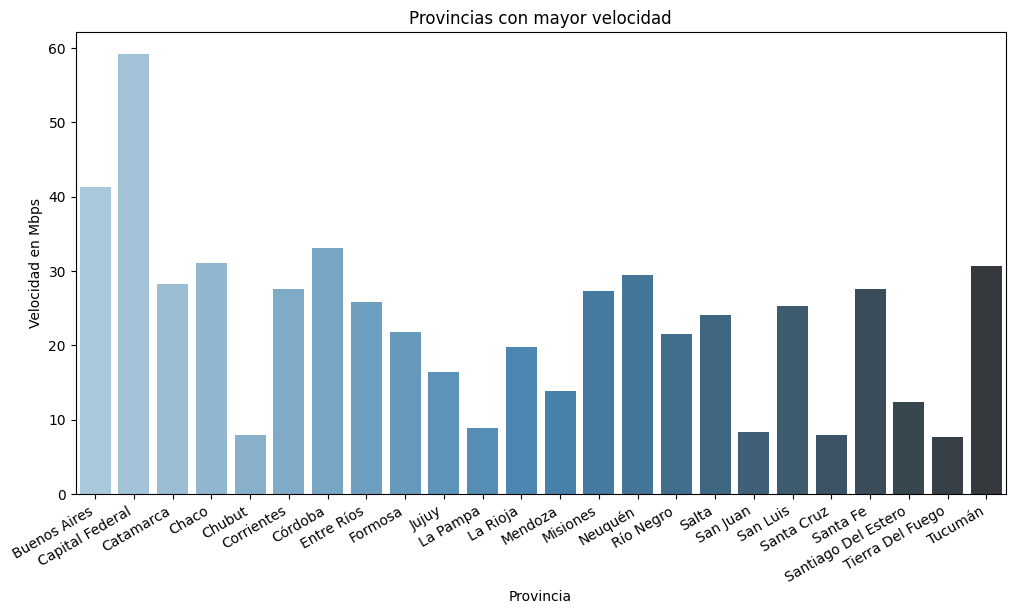

In [117]:
#Vamos agrupar por provincia y veremos que provincia tienen mayor velocidad de internet(Descarga)
fast = df_prov.groupby('Provincia')['Mbps (Media de bajada)'].mean().round(2)
# print(fast)

plt.figure(figsize=(12,6))
sns.barplot(x = fast.index, y= fast.values, palette= 'Blues_d')
plt.xlabel('Provincia')
plt.ylabel('Velocidad en Mbps')
plt.title('Provincias con mayor velocidad')
plt.xticks(rotation = 30, ha='right')
plt.show()

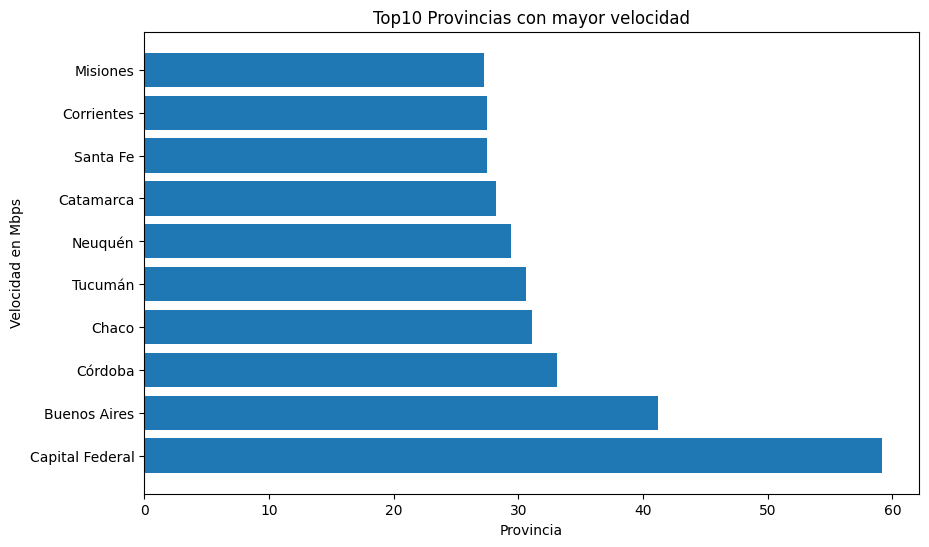

In [118]:
# Top 10
fast = df_prov.groupby('Provincia')['Mbps (Media de bajada)'].mean().round(2).reset_index()
fast1 = fast.sort_values(by ='Mbps (Media de bajada)', ascending=False)
top_fast = fast1.head(10)

# Creamos el Grafico 
plt.figure(figsize=(10,6))
plt.barh(top_fast['Provincia'], top_fast['Mbps (Media de bajada)'])
plt.xlabel('Provincia')
plt.ylabel('Velocidad en Mbps')
plt.title('Top10 Provincias con mayor velocidad')
plt.show()


In [126]:
# Veamos la velocidad del internet con paso de los años y los trimestres
trime = df_prov.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].mean().round(2).reset_index()
trime = trime.pivot(index= 'Año', columns='Trimestre', values= 'Mbps (Media de bajada)')
trime

Trimestre,1,2,3,4
Año,,,,
2014,3.24,3.34,3.38,3.64
2015,3.88,4.04,4.21,4.38
2016,4.46,4.63,4.93,5.13
2017,5.27,5.53,6.05,8.45
2018,9.04,9.27,10.04,10.60
2019,10.76,12.73,14.88,17.69
2020,20.19,21.45,23.14,24.26
2021,25.04,27.95,29.44,32.29
2022,34.71,37.30,39.66,68.50


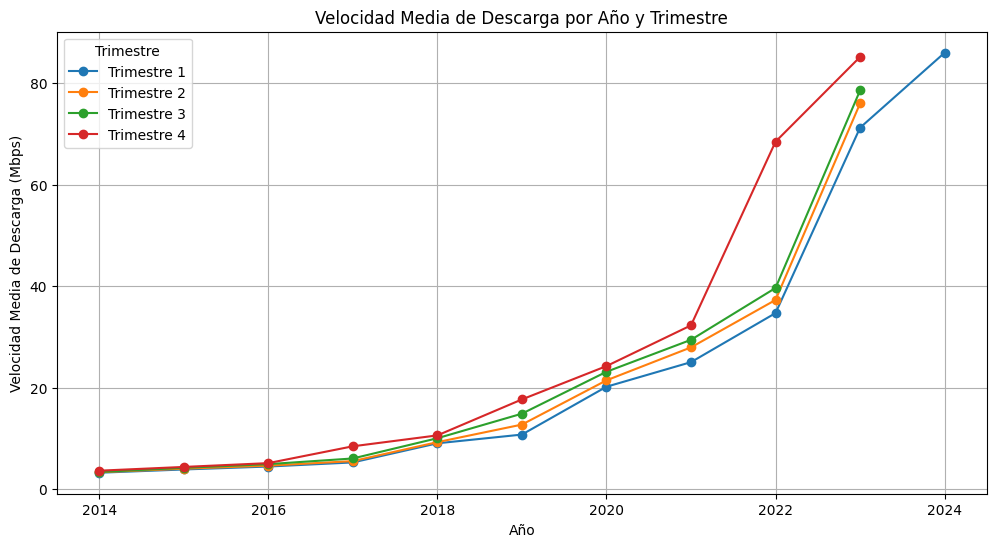

In [120]:
plt.figure(figsize=(12,6))
for trimestre in trime.columns:
    plt.plot(trime.index, trime[trimestre], marker='o', label=f'Trimestre {trimestre}')

plt.xlabel('Año')
plt.ylabel('Velocidad Media de Descarga (Mbps)')
plt.title('Velocidad Media de Descarga por Año y Trimestre')
plt.legend(title='Trimestre')
plt.grid(True)
plt.show()

***Podemos comunicar con toda confianza que hay un contraste muy alto, en la gráfica se puede apreciar que hace 10 años atras la velocidad del interent era muy baja, para lo que conocemos ahora es casi nula , cabe recalcar que en el año 1994 el 8 de abril fue la primera conexion de internet para argentina. Década de 2000: La banda ancha se consolidó como la modalidad de acceso preferida por los usuarios, y Internet se integró cada vez más en la vida cotidiana de los argentinos. Con el paso del tiempo vemos como la velocidad del internet fue aumentando, igual que la tecnología***

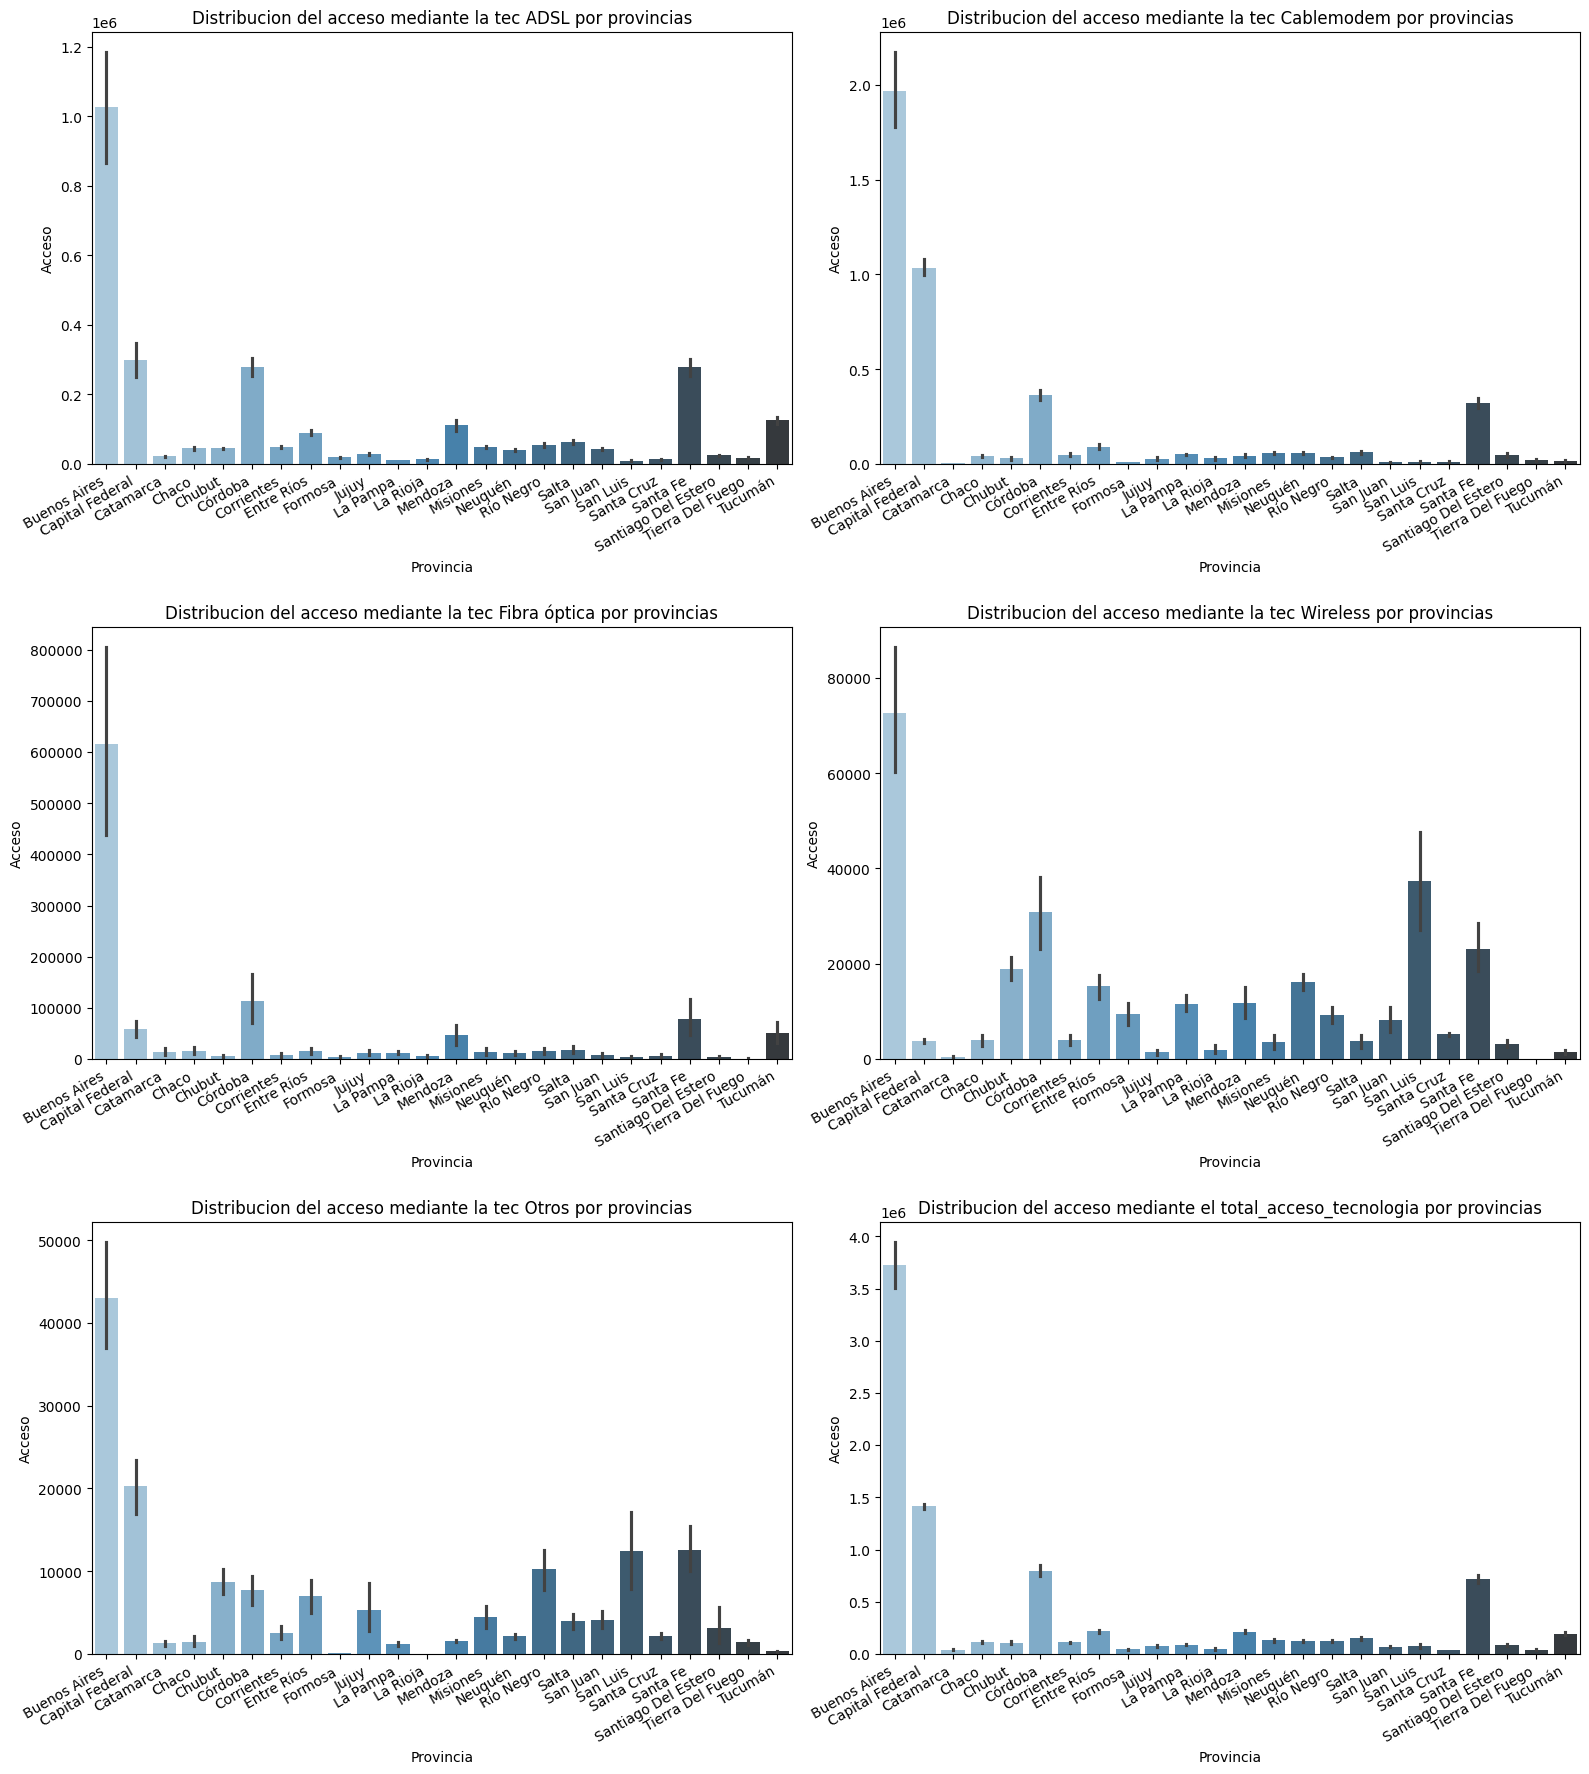

In [136]:
"""
Este analisis consiste en analizar 
la distribucion del internet en diferentes ambitos y en diferentes provincias
"""
fig, axes = plt.subplots(3, 2, figsize= (16, 18), sharey= False)

# Archivo acc_tec

# Primer gráfico: ADSL
sns.barplot(x = df_prov['Provincia'], y = df_prov['ADSL'],  palette= 'Blues_d', ax=axes[0, 0])
axes[0, 0].set_title('Distribucion del acceso mediante la tec ADSL por provincias')
axes[0, 0].set_ylabel('Acceso')
axes[0, 0].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Segundo gráfico: Cablemodem
sns.barplot(x = df_prov['Provincia'], y = df_prov['Cablemodem'], data= df_prov, palette= 'Blues_d', ax=axes[0, 1])
axes[0, 1].set_title('Distribucion del acceso mediante la tec Cablemodem por provincias')
axes[0, 1].set_ylabel('Acceso')
axes[0, 1].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Tercer gráfico: Fibra óptica
sns.barplot(x = df_prov['Provincia'], y = df_prov['Fibra óptica'], data= df_prov, palette= 'Blues_d', ax=axes[1, 0])
axes[1, 0].set_title('Distribucion del acceso mediante la tec Fibra óptica por provincias')
axes[1, 0].set_ylabel('Acceso')
axes[1, 0].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Cuarto gráfico: Wireless
sns.barplot(x = df_prov['Provincia'], y = df_prov['Wireless'], data= df_prov, palette= 'Blues_d', ax=axes[1, 1])
axes[1, 1].set_title('Distribucion del acceso mediante la tec Wireless por provincias')
axes[1, 1].set_ylabel('Acceso')
axes[1, 1].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Quinto gráfico: Otros
sns.barplot(x = df_prov['Provincia'], y = df_prov['Otros'], data= df_prov, palette= 'Blues_d', ax=axes[2, 0])
axes[2, 0].set_title('Distribucion del acceso mediante la tec Otros por provincias')
axes[2, 0].set_ylabel('Acceso')
axes[2, 0].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Sexto gráfico: total_acc_tec
sns.barplot(x = df_prov['Provincia'], y = df_prov['total_acc_tec'], data= df_prov, palette= 'Blues_d', ax=axes[2, 1])
axes[2, 1].set_title('Distribucion del acceso mediante el total_acceso_tecnologia por provincias')
axes[2, 1].set_ylabel('Acceso')
axes[2, 1].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()

***La provincia de Buenos Aires, una de las principales hablando de la conectividad y del mundo por ser la capital de argentina, tambien la Capital Federal o CABA, siendo Buenos Aires una las provincias más grandes del país, en los gráficos podemos apreciar que el acceso mediante diferentes tecnologías siempre es mayor para Buenos Aires y la capital Federal, claro tiene mucho sentido siendo la capital. En las demás provincias es menor por ejemplo en Tierra del Fuego es notable que en el acceso es poco eso es veridico, gracias a su ubicación que es el Antartico Sur.***

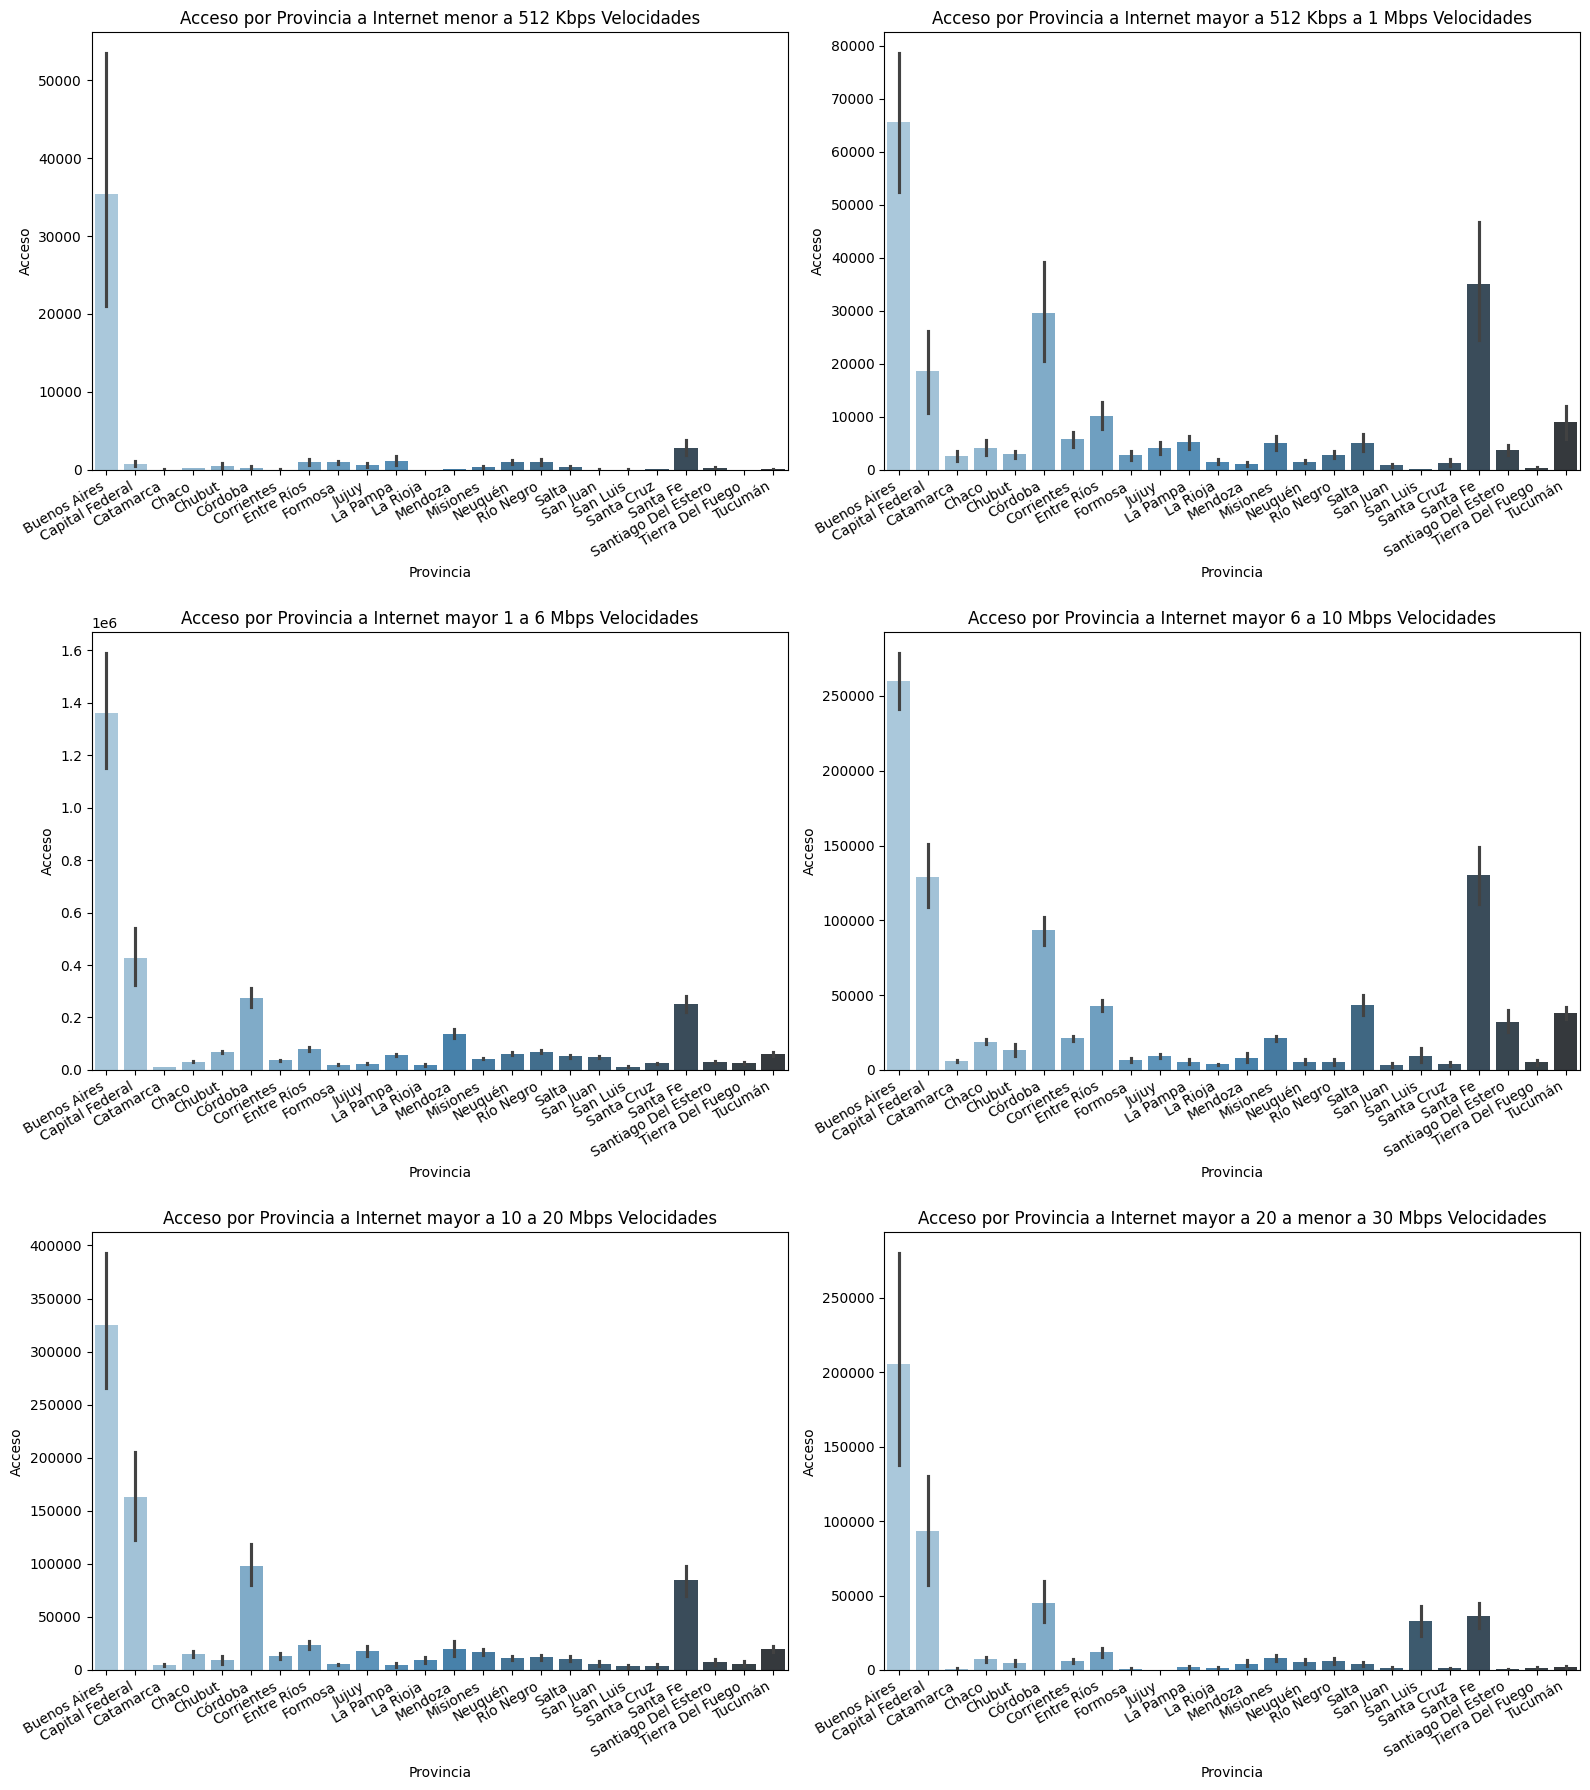

In [146]:
# En los siguientes gráficos podremos observar las distribucion del acceso por velocidad
fig, axes = plt.subplots(3, 2, figsize= (16, 18), sharey= False)

# Archivo acc_vel

# Primer gráfico: Menor a 512 Kbps
sns.barplot(x = df_prov['Provincia'], y = df_prov['HASTA 512 kbps'],  palette= 'Blues_d', ax=axes[0, 0])
axes[0, 0].set_title('Acceso por Provincia a Internet menor a 512 Kbps Velocidades')
axes[0, 0].set_ylabel('Acceso')
axes[0, 0].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Segundo gráfico: Mayor 512 Kbps pero menor a 1 Mbps
sns.barplot(x = df_prov['Provincia'], y = df_prov['+ 512 Kbps - 1 Mbps'], data= df_prov, palette= 'Blues_d', ax=axes[0, 1])
axes[0, 1].set_title('Acceso por Provincia a Internet mayor a 512 Kbps a 1 Mbps Velocidades')
axes[0, 1].set_ylabel('Acceso')
axes[0, 1].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Tercer gráfico: mayor a 1 Mbps pero menor a 6 Mbps
sns.barplot(x = df_prov['Provincia'], y = df_prov['+ 1 Mbps - 6 Mbps'], data= df_prov, palette= 'Blues_d', ax=axes[1, 0])
axes[1, 0].set_title('Acceso por Provincia a Internet mayor 1 a 6 Mbps Velocidades')
axes[1, 0].set_ylabel('Acceso')
axes[1, 0].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Cuarto gráfico: Mayor a 6 menor a 10 Mbps
sns.barplot(x = df_prov['Provincia'], y = df_prov['+ 6 Mbps - 10 Mbps'], data= df_prov, palette= 'Blues_d', ax=axes[1, 1])
axes[1, 1].set_title('Acceso por Provincia a Internet mayor 6 a 10 Mbps Velocidades')
axes[1, 1].set_ylabel('Acceso')
axes[1, 1].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Quinto gráfico: mayor a 10 menor a 20 Mbps
sns.barplot(x = df_prov['Provincia'], y = df_prov['+ 10 Mbps - 20 Mbps'], data= df_prov, palette= 'Blues_d', ax=axes[2, 0])
axes[2, 0].set_title('Acceso por Provincia a Internet mayor a 10 a 20 Mbps Velocidades')
axes[2, 0].set_ylabel('Acceso')
axes[2, 0].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Sexto gráfico: mayor a 20 pero menor a 30 Mbps
sns.barplot(x = df_prov['Provincia'], y = df_prov['+ 20 Mbps - 30 Mbps'], data= df_prov, palette= 'Blues_d', ax=axes[2, 1])
axes[2, 1].set_title('Acceso por Provincia a Internet mayor a 20 a menor a 30 Mbps Velocidades')
axes[2, 1].set_ylabel('Acceso')
axes[2, 1].set_xticklabels(labels = df_prov['Provincia'], rotation = 30, ha= 'right')

# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()

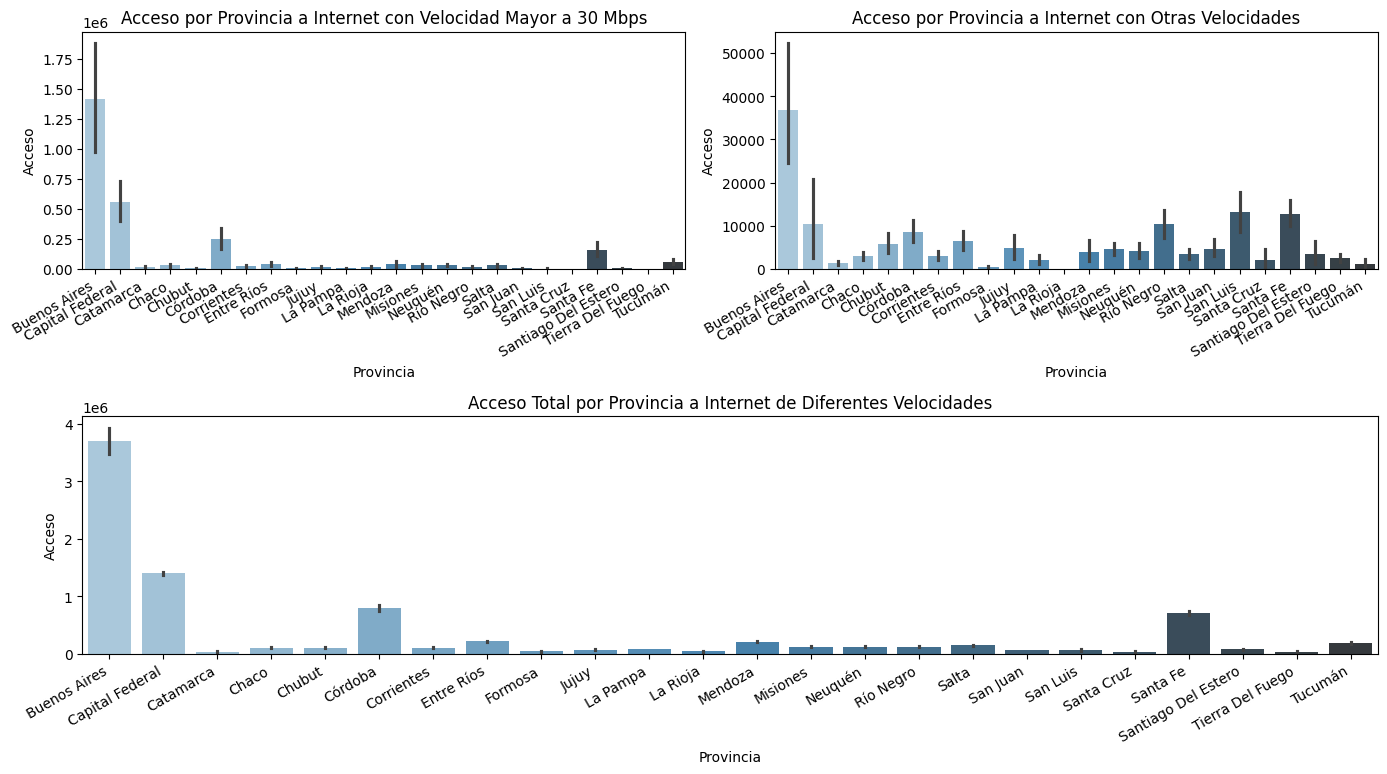

In [145]:
# Faltan 3 columnas, vamos a terminar de gráficar todos los accesos a las velocidades de internet
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

# Séptimo Gráfico: Mayor a 30 Mbps
ax0 = fig.add_subplot(gs[0, 0])
sns.barplot(x=df_prov['Provincia'], y=df_prov['+ 30 Mbps'], data=df_prov, palette='Blues_d', ax=ax0)
ax0.set_title('Acceso por Provincia a Internet con Velocidad Mayor a 30 Mbps')
ax0.set_ylabel('Acceso')
ax0.set_xticklabels(labels=df_prov['Provincia'], rotation=30, ha='right')

# Octavo Gráfico: Otros
ax1 = fig.add_subplot(gs[0, 1])
sns.barplot(x=df_prov['Provincia'], y=df_prov['OTROS'], data=df_prov, palette='Blues_d', ax=ax1)
ax1.set_title('Acceso por Provincia a Internet con Otras Velocidades')
ax1.set_ylabel('Acceso')
ax1.set_xticklabels(labels=df_prov['Provincia'], rotation=30, ha='right')

# Noveno Gráfico: Total_acceso_velocidad
ax2 = fig.add_subplot(gs[1, :])
sns.barplot(x=df_prov['Provincia'], y=df_prov['total_acc_vel'], data=df_prov, palette='Blues_d', ax=ax2)
ax2.set_title('Acceso Total por Provincia a Internet de Diferentes Velocidades')
ax2.set_ylabel('Acceso')
ax2.set_xticklabels(labels=df_prov['Provincia'], rotation=30, ha='right')

for ax in [ax0, ax1, ax2]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()
